# Play with automated image augmentation in under 5 minutes
---
*Last Updated 22 May 2020*   

Image augmentation is a technique used to increase image dataset size and diversity used for training computer vision models. It reduces overfitting and increases the ability of a model to generalize to broader datasets. 

Play with image augmentation using your own image and the [imgaug library](https://github.com/aleju/imgaug). You'll be able to automatically rotate, flip, adjust hue/saturation, blur, rotate and crop the image using math and computer programming without any image processing software!

## Installs
---
Run this code block by dragging your mouse over the brackets to the left of line 1 and press the "play" button. It takes about 30 seconds to run and you will see some text being output beneath the block. After it is finished, scroll down to **Image Augmentation**.

In [ ]:
# Install libraries for augmenting and displaying images
!pip install imgaug
!pip install pillow

# For importing/exporting files, working with arrays, etc
import time
import urllib
import numpy as np
import pandas as pd
import imageio

# For drawing onto and plotting the images
import matplotlib.pyplot as plt
import cv2
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# For uploading an image from url
# Modified from https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image



# For augmenting the images and bounding boxes
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug import parameters as iap
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Set-up augmentation parameters 
from imgaug import augmenters as iaa
# Set number of seconds to timeout if image url taking too long to open
import socket
socket.setdefaulttimeout(10)
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
# Define image augmentation pipeline
# Modified from https://github.com/aleju/imgaug
# Optional: Adjust augmentation parameters in rows 42-47
seq = iaa.Sequential(
        [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5), # horizontally flip 50% of all images
            iaa.Flipud(0.2), # vertically flip 20% of all images
            # crop images by -5% to 10% of their height/width
            sometimes(iaa.CropAndPad(
                percent=(-0.05, 0.1),
                pad_mode=ia.ALL,
                pad_cval=(0, 255)
            )),
            sometimes(iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
                rotate=(-45, 45), # rotate by -45 to +45 degrees
                shear=(-16, 16), # shear by -16 to +16 degrees
                order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                cval=(0, 255), # if mode is constant, use a cval between 0 and 255
                mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
            ))
        ],random_order = True)

## Image Augmentation - Play with random automated image processing techniques for your image
---
You can either **A) Load an image in by URL** or **B) Load an image in from file**. 

**A) Load in individual image by URL**   
Read in any image from a URL and see the results of random image augmentation techniques!   
1. To get an image from a url:  
* For images from [CCSearch](https://ccsearch.creativecommons.org/), click the image you want. Next, right click the image and select "open image in new tab."  
* For images from [Google Images](https://images.google.com/), right click the image you want and select "open image in new tab."
2. Copy the url and paste it within the quotes on line 2 in the code block below.
3. Drag your mouse over the brackets to the left of line 1 and press the "play" button on the right.
4. Optional: Adjust augmentation parameters in **Installs** rows 42-47.

In [ ]:
# Insert your URL here
url = "https://extension.msstate.edu/sites/default/files/newsletter-images/bug%E2%80%99s-eye-view/unnamed(2).jpg"

# Augment train images and bounding boxes
try:
  # Read in image from URL
  img = url_to_image(url)

  # Augment image using settings defined above in seq
  augimgs = [seq.augment(image=img) for x in range(6)]

  # Display augmented image
  nrows, ncols = 2, 3
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
  ax[0][0].imshow(img)
  ax[0][0].set_title("Original Image")
  # plot simple raster image on each sub-plot
  for i, axi in list(enumerate(ax.flat))[1:]:
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    axi.imshow(augimgs[i])
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    # write row/col indices as axes' title for identification
    axi.set_title("Augmented Version "+str(i))
  plt.tight_layout(True)
  plt.show()
        
  # Display message to track augmentation process by image
  print('Successfully augmented image from {}'.format(url))
  
except:
  print('Error: check if web address for image from {} is valid'.format(url))

Error: check if web address for image from https://extension.msstate.edu/sites/default/files/newsletter-images/bug%E2%80%99s-eye-view/unnamed(2).jpg is valid


**B) Load in individual image by file**   
Read in any image from file and play with automated image augmentation techniques!  
To get an image from file:  
1. Click the folder icon in the left side panel. 
2. Click "Upload"
3. Select any image from your computer to upload. 
4. Copy your image filename within the quotes on line 3 in the code block below.  
5. Drag your mouse over the brackets to the left of line 1 and press the "play" button on the right.
6. Optional: Adjust augmentation parameters in **Installs** rows 42-47.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/landslide/'

/content/gdrive/My Drive/landslide


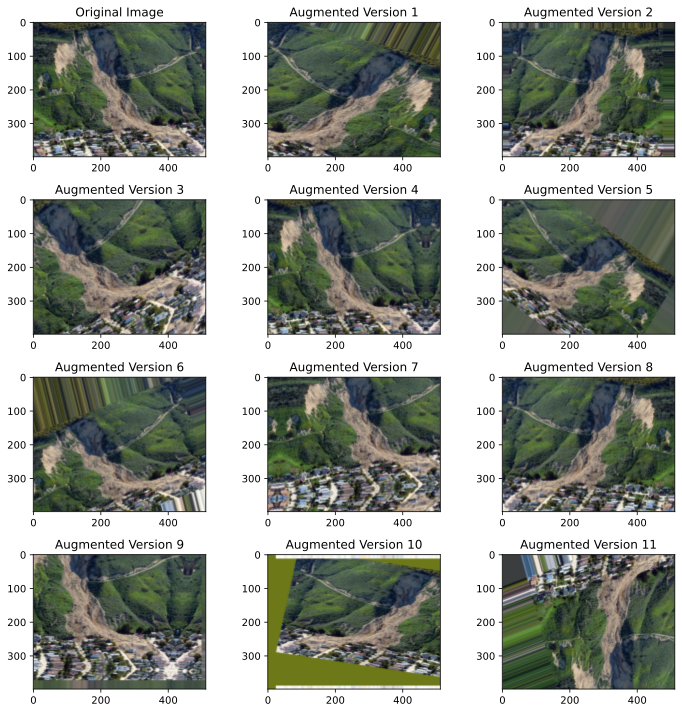

Successfully augmented image from train (50).jpg


In [ ]:
# Insert your filename at line 3
inpath = '/content/gdrive/My Drive/landslide/datasets/train/'
filename = 'train (50).jpg'

# Augment train images and bounding boxes
# Read in image from file
fpath = inpath + filename
img = imageio.imread(fpath, pilmode='RGB')

# Augment image using settings defined above in seq
augimgs = [seq.augment(image=img) for x in range()]

# Display augmented image
nrows, ncols = 4, 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
ax[0][0].imshow(img)
ax[0][0].set_title("Original Image")
# plot simple raster image on each sub-plot
for i, axi in list(enumerate(ax.flat))[1:]:
  # i runs from 0 to (nrows*ncols-1)
  # axi is equivalent with ax[rowid][colid]
  axi.imshow(augimgs[i])
  # get indices of row/column
  rowid = i // ncols
  colid = i % ncols
  # write row/col indices as axes' title for identification
  axi.set_title("Augmented Version "+str(i))
plt.tight_layout(True)
plt.show()
        
# Display message to track augmentation process by image
print('Successfully augmented image from {}'.format(filename))